# Heart Disease Classification
### Project Outline:
This project is to help a hospital predict whether a patient would have heart disease or not based on their medical attributes

I will take the following approach:
    1. Problem Definition
    2. Data
    3. Evaluation
    4. Features
    5. Modeling
    6. Experimentation

## 1. Problem definition
Given a data set, can we predict whether someone would have heart disease or not?

## 2. Data
Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

The original data came from the Cleveland data from the UCI Machine Learning Repo:
 - https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Create data dictionary**
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing the tools for a Classification problem
I will use pandas, Matplotlib, NumPy and SciKit-Learn

In [1]:
# Import all the tools I will need:

# Regular EDA (exploratory data analysis) and plotting libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import models from SciKit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn import preprocessing

In [2]:
## Load Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration AKA EDA

The goal is to find out more about the data and become somewhat of a SME
1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data, and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of our data?

In [4]:
# How many of each class there are?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

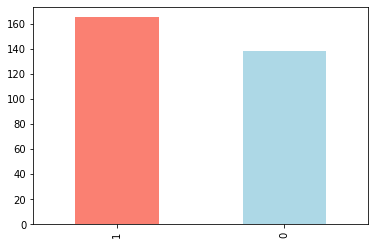

In [5]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


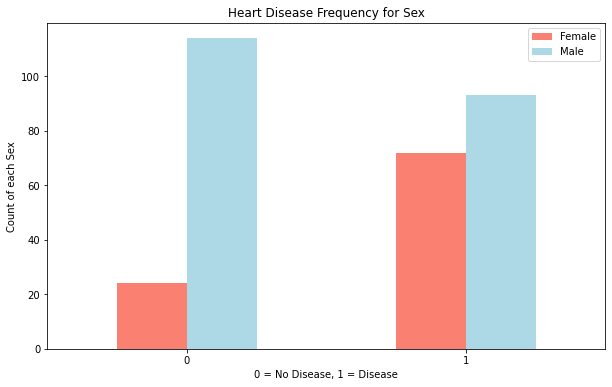

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['salmon', 'lightblue']);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count of each Sex")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);

## Age Vs. Max Heart Rate for Heart Disease

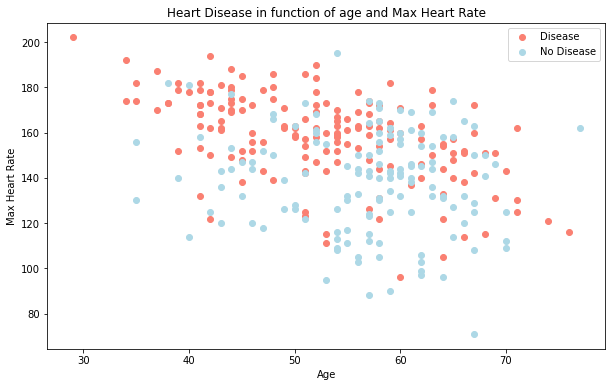

In [12]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples (patients with heart disease)
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Scatter with negative examples (patients without heart disease)
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue');

# Add some info
plt.title("Heart Disease in function of age and Max Heart Rate")
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

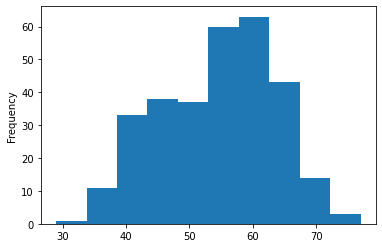

In [13]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type
CP: Types of chest pain -
* 0. Typical Angina: chest pain related to decreased blood supply to the heart
* 1. Atypical Angina: chest pain not related to heart
* 2. Non-anginal pain: typically esophageal spasms (non heart related)
* 3. Asymptomatic: chest pain not showings signs of disease

In [14]:
pd.crosstab(df.cp, df.target)
# non heart related pain leads to higher amounts of heart disease... makes no sense, but I am not a doctor :)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


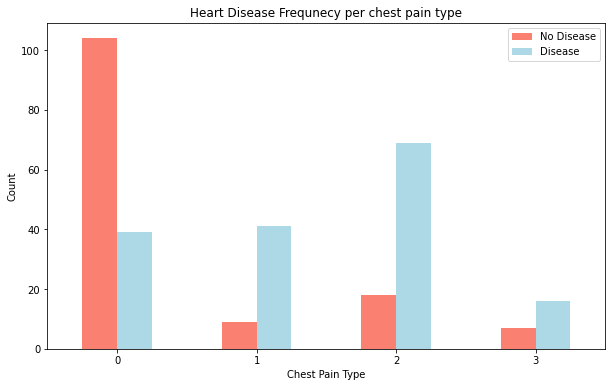

In [15]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'])
plt.title("Heart Disease Frequnecy per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

**This is something I would take to a SME, and ask them for their expertise, advice and ideas.**
- Because this data does not exactly make sense as to why this less serious type of pain would be coupled with more disease

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


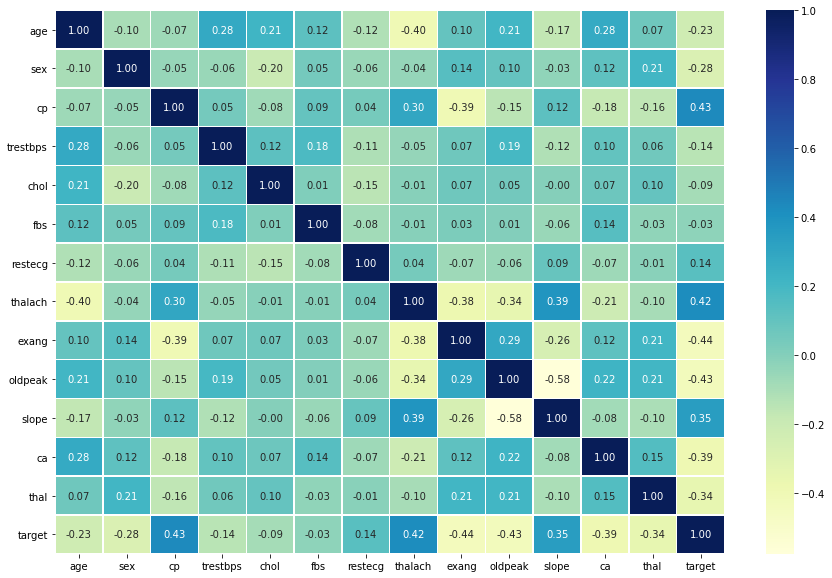

In [18]:
# Make our correlation matrix visually pleasing
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                cmap="YlGnBu")

## What does this heat map tell us?
- A higher positive value, means a potential positive correlation
- A higher negative value, means a potential negative correlation

**Positive**: So as CP (chest pain) goes up, the target also increases. You can see that in our previous bar charts as well. It goes up from 0-2.

**Negative**: So as Exang goes down, so should the target value.
- Exang is exercise induced heart pain: 1 being yes, 0 being no.
- This makes sense because if you do not have exercise induced heart pain, logically you would be less likely to have heart disease

**Neutral**: When we look at FBS or fasting bloodsugar, we see it has a -0.03 effect on our target. This effectively means that fbs has minimal, if any, effect on our target.

## 5. Modeling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Split data into x and y
x = df.drop('target', axis=1)
y = df['target']

In [21]:
norm_x = preprocessing.normalize(x)

In [22]:
# Split data into train and test sets
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Let's build a machine learning model
Which model should we use?
- Helpful Guide: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Let's try a few different models:
1. Logistic Regression
2. K-Nearest Neighers Classification
3. Random Forest Classifier

In [23]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different SciKit-Learn models
    x_train: training data (no labels)
    x_test: test data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Performance with Normalized Data

In [25]:
# Normalized scores
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(norm_x, y, test_size=0.2)

model_scores_norm = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores_norm

{'Logistic Regression': 0.639344262295082,
 'KNN': 0.7213114754098361,
 'Random Forest': 0.8524590163934426}

## Model Comparison
- Using non-normalized data since they performed better

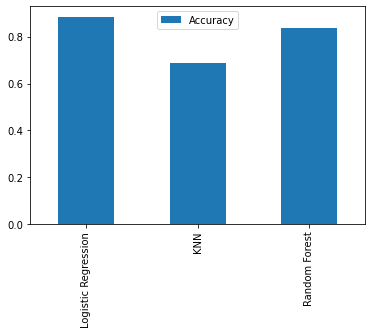

In [26]:
model_compare = pd.DataFrame(model_scores, index =["Accuracy"])
model_compare.T.plot.bar();

In [27]:
# Get rid of the normalize data
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

We now have a good baseline model. Let's try to explore further to see if we can improve this model.

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision, Recall, F1
* Classification Report
* ROC Curve
* Area under the curve (AUC)

## Hyperparameter Tuning by hand ( inefficient for multiple parameters)

In [28]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through diff n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


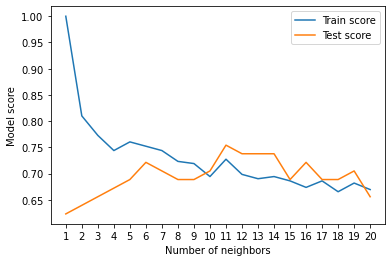

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Through tuning our KNN model, we were able to get our initially accuracy from 68% to 75% by changing the **N** from it's default, 5, to 11
- Unfortunately after tuning, KNN is still not as good as logistic regression

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisiticRegression()
* RandomForestClassifier()

... Using RandomizedSearchCV

In [32]:
# Create a hyperparamter grid for logistic regression
# For logistic regression, C is the best hyperparameter to try and tune.
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create hyperparamter grid for RandomForestClassifier
# For RFC, n_estimators(how many trees), max_depth, min_samples_split, and min_samples_leaf are the best HP to tune
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

Now that we have hyperparameter grids set up for our models, let's tune them using RandomizedSearchCV

In [33]:
# Tune LogisticRegression

np.random.seed(42)

# Set up random hyperparameter search for LogReg
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter=20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

After tuning our logistic regression model, we got the same accuracy score as our original LogReg model

Now let's tune our RandomForestClassifier()

In [36]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
#Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   53.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
# Evaluate
rs_rf.score(x_test, y_test)

0.8688524590163934

We have improved our RandomForest model by about 3%, but unfortunately it is still not performing as well as logistic regression
- RandomForest is also significantly slower than LogisticRegression, making LogisticRegression the algorithm of choice for this problem

## Hyperparameter Tuning with GridSearchCV

Since our LogisiticRegression model provides the best scores so far, we can now try to improve them even more with GridSearchCV
- With gridsearch there is no n_iter, because it tries every single combination possible
- RandomizedSearchCV does a random number of combinations based on the n_iter

In [39]:
# Different hyperparamters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
# Evaluate
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [42]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

After many attempts to improve this model, it refuses to be better than it's original self.

## Evaluating our tuned machine learning classifier, beyond accuracy
### Always evaluate your machine learning models on the test data set

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision, Recall, and F1-Score

... Using cross-validation when possible

To make comparisions and evaluate our trained model, first we need to make predicitions

In [43]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### ROC Curve = Created by plotting the True Positive Rate against the False Positive Rate at various threshold settings
- A perfect model gets a score of 1.0

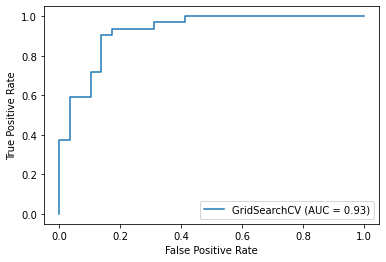

In [44]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test);

A score of 0.93 is very good

### Confusion Matrix

In [45]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


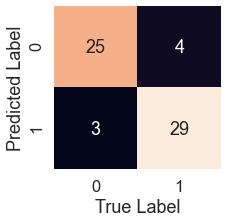

In [46]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

### Classification Report & Cross Validated Precision, Recall and F-1 Score

Positive and Negative Explained:
- True Positive = Model predicts a 1, when the truth is 1
- False Positive = Model predicts a 1, when truth is 0
- True Negative = Model predicts 0, when truth is 0
- False Negative = Model predicts 0, when truth is 1

Definitions:
* Precision = Indicates the proportion of positive indentifications (model predicted class 1) which were actually correct. A model which predicts no false positives has a precision of 1.0
* Recall = Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0
* F-1 Score = A combination of precision and recall. A perfect model achieves an F1 of 1.0
* Support = The number of samples we calculated on
* Macro Avg = The average result of the two classes. Our classes are 0 and 1. It does not take class imbalance into account. So if you do have class imbalane, pay attention to the macro avg
* Weighted Avg = Each metric is calculated with respect to how many samples they are in each class, meaning it favors the class with more samples giving it a higher weight

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



This classification report gives us good insight, but it is **not cross validated** and has only been done on test set

### Calculate Evaluation Metrics using Cross-Validation

We're going to calculate accuracy, precision, recall, and f1-score of our model using cross-validation using `cross_val_score()`
- We pass it all of the data (x and y) instead of test data because we are cross-validating

In [48]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [50]:
# Cross-Validated Accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring="accuracy")
cv_acc = cv_acc.mean()
cv_acc

0.8446994535519124

In [51]:
# Cross-Validated Precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring="precision")
cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [52]:
# Cross-Validated Recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring="recall")
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [53]:
# Cross-Validated F1-Score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring="f1")
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

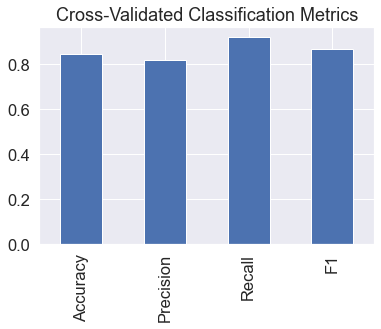

In [54]:
# Visualize CV Metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                              index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics", legend=False );

### Feature Importance

Feature Importance = Which features contributed most to the outcomes of the model, and how did they contribute?

Finding feature importance is different for each machine learning model
- We need the LogisticRegression feature importance
- Search (MODEL NAME) Feature Importance on your chosen web browser

In [55]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(x_train, y_train);

In [57]:
# Check coef_ (coefficient)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

This tells us how each column in our data set, affects the target data

In [58]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

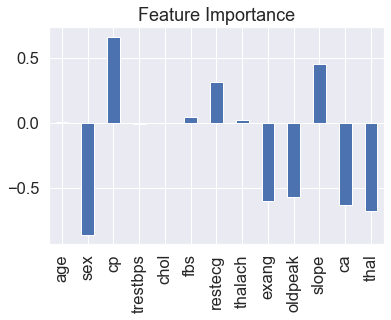

In [59]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

In [60]:
pd.crosstab(df["sex"], df["target"])
# As sex (from 0 to 1) increases the RATIO goes down.
# 0 or Female has 3 times as many trues
# 1 or Male has a more even split

target,0,1
sex,,
0,24,72
1,114,93


In [61]:
pd.crosstab(df['slope'], df['target'])
# According to our feature importance, as slope increases, so should our Target.
# We see this is True below

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Slope = The slope of the peak exercise ST segment
- 0: Upsloping: Better heart rate with exercise (uncommon)
- 1: Flatsloping: Minimal change (typical healthy heart)
- 2: Downsloping: Signs of an unhealthy heart

## 6. Experimentation

Since we have not hit our evaluation metric yet... what should we do?

* Could we collect more samples?
* Could we try a better model? Like CatBoost or XGBoost?
* Could we improve the current models? (beyond what we've done so far)

Let's see our model is hypothetically good enough... How could we export it and share it?
   * Use Pickle or JobLib (JobLib is better for SKLearn models)